In [74]:
#!source activate tensorflow
import tensorflow as tf
from tensorflow.python.estimator.inputs import pandas_io
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
import pandas as pd
from tensorflow.contrib.tensor_forest.client import random_forest
from tensorflow.python.estimator.inputs import numpy_io
import numpy as np
from tensorflow.contrib import layers
from tensorflow.contrib.learn.python import learn
from tensorflow.python.estimator.inputs.queues import feeding_functions
from sklearn.preprocessing import LabelEncoder

In [2]:
tf.__version__
#!pip install tensorflow==1.4.1

'1.4.1'

In [75]:
# Import hotel data
Hotel_Reviews=pd.read_csv("Hotel_Reviews.csv")

Hotel_Reviews_Filtered=Hotel_Reviews[(Hotel_Reviews.lat.notnull() | Hotel_Reviews.lng.notnull())]
Hotel_Reviews_Filtered_Target=Hotel_Reviews_Filtered.pop("Reviewer_Score")
Hotel_Reviews_Filtered_Features=Hotel_Reviews_Filtered[["Average_Score","lat","lng",'Reviewer_Nationality','Hotel_Name','Review_Total_Positive_Word_Counts',"Review_Total_Negative_Word_Counts"]]




In [62]:
lb_make = LabelEncoder()
Hotel_Reviews_Filtered_Features["Reviewer_Nationality_Code"] = lb_make.fit_transform(Hotel_Reviews_Filtered_Features["Reviewer_Nationality"])
Hotel_Reviews_Filtered_Features["Hotel_Name_Code"]=lb_make.fit_transform(Hotel_Reviews_Filtered_Features["Hotel_Name"])
Hotel_Reviews_Filtered_Features=Hotel_Reviews_Filtered_Features.drop(['Reviewer_Nationality','Hotel_Name'],axis=1)
Hotel_Reviews_Filtered_Features

/Users/anantnaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anantnaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Average_Score        lat        lng  \
0                 7.7  52.360576   4.915968   
1                 7.7  52.360576   4.915968   
2                 7.7  52.360576   4.915968   
3                 7.7  52.360576   4.915968   
4                 7.7  52.360576   4.915968   
5                 7.7  52.360576   4.915968   
6                 7.7  52.360576   4.915968   
7                 7.7  52.360576   4.915968   
8                 7.7  52.360576   4.915968   
9                 7.7  52.360576   4.915968   
10                7.7  52.360576   4.915968   
11                7.7  52.360576   4.915968   
12                7.7  52.360576   4.915968   
13                7.7  52.360576   4.915968   
14                7.7  52.360576   4.915968   
15                7.7  52.360576   4.915968   
16                7.7  52.360576   4.915968   
17                7.7  52.360576   4.915968   
18                7.7  52.360576   4.915968   
19                7.7  52.360576   4.915968   
20                7.7  52.360576   4.915968   
21                7.7  52.360576   4.915968   
22                7.7  52.360576   4.915968   
23                7.7  52.360576   4.915968   
24                7.7  52.360576   4.915968   
25                7.7  52.360576   4.915968   
26                7.7  52.360576   4.915968   
27                7.7  52.360576   4.915968   
28                7.7  52.360576   4.915968   
29                7.7  52.360576   4.915968   
...               ...        ...        ...   
515708            8.1  48.203745  16.335677   
515709            8.1  48.203745  16.335677   
515710            8.1  48.203745  16.335677   
515711            8.1  48.203745  16.335677   
515712            8.1  48.203745  16.335677   
515713            8.1  48.203745  16.335677   
515714            8.1  48.203745  16.335677   
515715            8.1  48.203745  16.335677   
515716            8.1  48.203745  16.335677   
515717            8.1  48.203745  16.335677   
515718            8.1  48.203745  16.335677   
515719            8.1  48.203745  16.335677   
515720            8.1  48.203745  16.335677   
515721            8.1  48.203745  16.335677   
515722            8.1  48.203745  16.335677   
515723            8.1  48.203745  16.335677   
515724            8.1  48.203745  16.335677   
515725            8.1  48.203745  16.335677   
515726            8.1  48.203745  16.335677   
515727            8.1  48.203745  16.335677   
515728            8.1  48.203745  16.335677   
515729            8.1  48.203745  16.335677   
515730            8.1  48.203745  16.335677   
515731            8.1  48.203745  16.335677   
515732            8.1  48.203745  16.335677   
515733            8.1  48.203745  16.335677   
515734            8.1  48.203745  16.335677   
515735            8.1  48.203745  16.335677   
515736            8.1  48.203745  16.335677   
515737            8.1  48.203745  16.335677   

        Review_Total_Positive_Word_Counts  Review_Total_Positive_Word_Counts  \
0                                      11                                 11   
1                                     105                                105   
2                                      21                                 21   
3                                      26                                 26   
4                                       8                                  8   
5                                      20                                 20   
6                                      18                                 18   
7                                      19                                 19   
8                                       0                                  0   
9                                      50                                 50   
10                                    101                                101   
11                                      4                                  4   
12                                      6            

In [85]:
Hotel_Reviews_Filtered_Features["Average_Score"]=pd.to_numeric(Hotel_Reviews_Filtered_Features["Average_Score"], downcast='float')
Hotel_Reviews_Filtered_Features["lat"]=pd.to_numeric(Hotel_Reviews_Filtered_Features["lat"], downcast='float')
Hotel_Reviews_Filtered_Features["lng"]=pd.to_numeric(Hotel_Reviews_Filtered_Features["lng"], downcast='float')





/Users/anantnaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/anantnaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/anantnaw/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [ ]:
lb_make = LabelEncoder()
Hotel_Reviews_Filtered_Features["Reviewer_Nationality_Code"] = lb_make.fit_transform(Hotel_Reviews_Filtered_Features["Reviewer_Nationality"])
Hotel_Reviews_Filtered_Features["Hotel_Name_Code"]=lb_make.fit_transform(Hotel_Reviews_Filtered_Features["Hotel_Name"])
#check for scaling min/max normal, which scaling method to use

In [67]:
#binary

#binary

features=Hotel_Reviews_Filtered_Features
targets=Hotel_Reviews_Filtered_Target

In [315]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features[['Average_Score','lat','lng','Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts']] = scaler.fit_transform(features[['Average_Score','lat','lng','Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts']].as_matrix())

TypeError: 'MinMaxScaler' object is not subscriptable

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)

/Users/anantnaw/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
X_Train[['Average_Score','lat','lng','Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts']] = mms.fit_transform(X_Train[['Average_Score','lat','lng','Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts']])
X_Test[['Average_Score','lat','lng','Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts']] = mms.fit_transform(X_Test[['Average_Score','lat','lng','Review_Total_Positive_Word_Counts','Review_Total_Negative_Word_Counts']])

In [ ]:
x=tf.cast(Hotel_Reviews_Filtered_Features.values,tf.float64)
y=Hotel_Reviews_Filtered_Target.astype(np.float32).values

In [ ]:
Hotel_Reviews_Filtered

In [34]:

x=Hotel_Reviews_Filtered_Features.to_dict('list')

for key in x:
        x[key] = np.array(x[key])
y=np.array(Hotel_Reviews_Filtered_Target.values)
#y=hotel_Reviews_Filtered_Target.values

x

{'Average_Score': array([7.7, 7.7, 7.7, ..., 8.1, 8.1, 8.1]),
 'lat': array([52.3605759, 52.3605759, 52.3605759, ..., 48.2037451, 48.2037451,
        48.2037451]),
 'lng': array([ 4.9159683,  4.9159683,  4.9159683, ..., 16.3356767, 16.3356767,
        16.3356767])}

In [ ]:
train.drop(['Species', 'Id'], axis=1).astype(tf.float32).values

In [77]:
def getFeatures():
    #Reviewer_Score = tf.feature_column.numeric_column('Reviewer_Score')
    Average_Score = tf.contrib.layers.real_valued_column('Average_Score')
    lat = tf.contrib.layers.real_valued_column('lat')
    lng = tf.contrib.layers.real_valued_column('lng')
    Reviewer_Nationality=tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket("Reviewer_Nationality", hash_bucket_size=230),dimension=4)
    Hotel_Name=tf.feature_column.embedding_column(tf.feature_column.categorical_column_with_hash_bucket("Hotel_Name", hash_bucket_size=1500),dimension=5)
    Review_Total_Positive_Word_Counts=tf.contrib.layers.real_valued_column("Review_Total_Positive_Word_Counts")
    Review_Total_Negative_Word_Counts=tf.contrib.layers.real_valued_column("Review_Total_Negative_Word_Counts")
    return [Average_Score,lat, lng,Reviewer_Nationality,Hotel_Name,Review_Total_Positive_Word_Counts,Review_Total_Negative_Word_Counts]


In [23]:
#specify params
params = tf.contrib.tensor_forest.python.tensor_forest.ForestHParams(
  num_classes=1, num_features=3, regression=True, num_trees=10, max_nodes=1000)

graph_builder_class = tensor_forest.RandomForestGraphs


In [ ]:
#shuffle data to ensure its in random order(remove hotel-wise stratification)


In [ ]:
test.drop(['Species', 'Id'], axis=1).astype(np.float32).values


In [10]:
#build the graph
graph_builder_class = tensor_forest.RandomForestGraphs


In [71]:
est=random_forest.TensorForestEstimator(params,feature_columns=getFeatures(), graph_builder_class=graph_builder_class)

NameError: name 'params' is not defined

In [ ]:
a = np.arange(2) * 1.0
a=tf.cast(a,tf.float32)
b = np.arange(32, 34)
#b=tf.cast(b,tf.float32)
x = {'a': a, 'b': b}
#y = np.arange(-32, -30)
x = {"Average_Score": np.array([1,2]),
     "lat": np.array([1,2]).astype(np.float64),
    "lng":np.array([1,2]).astype(np.float64)}
for key in x:
        x[key] = tf.cast(x[key],tf.float64)
y=np.array([1,2]).astype(np.float64)
x

In [36]:
#define input function

train_input_fn = numpy_io.numpy_input_fn(
      x=x,
      y=y,
      num_epochs=None,
      shuffle=True)

In [37]:
x

{'Average_Score': array([7.7, 7.7, 7.7, ..., 8.1, 8.1, 8.1]),
 'lat': array([52.3605759, 52.3605759, 52.3605759, ..., 48.2037451, 48.2037451,
        48.2037451]),
 'lng': array([ 4.9159683,  4.9159683,  4.9159683, ..., 16.3356767, 16.3356767,
        16.3356767])}

In [109]:
def leaky_relu(x):
    return tf.nn.relu(x) - 0.01 * tf.nn.relu(-x)


In [78]:
#remove outliers, regularize co related(overfitting columns), bucketize data
#relu+adam= best, adagrad*default= most stable
dnnregressor = tf.contrib.learn.DNNRegressor(feature_columns=getFeatures(),
     hidden_units=[512, 256,128])
dnnregressor.fit(input_fn=pandas_io.pandas_input_fn(x=X_train,y=y_train,shuffle=True), steps=7000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c825d0358>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/hw/634l23g14hzczy11v01bh3nm3hrckc/T/tmp2lvq31eo'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/hw/634l23g14hzczy11v01bh3nm3hrckc/T/tmp2lvq31eo/model.ckpt.
INFO:tensorflow:loss = 68.056725, step = 1
INFO:tensorflow:global_step/sec: 146.617
INFO:tensorflow:loss = 3.1847196, 

DNNRegressor(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._RegressionHead object at 0x1c3f3413c8>, 'hidden_units': [512, 256, 128], 'feature_columns': (_RealValuedColumn(column_name='Average_Score', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='lat', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _RealValuedColumn(column_name='lng', dimension=1, default_value=None, dtype=tf.float32, normalizer=None), _EmbeddingColumn(categorical_column=_HashedCategoricalColumn(key='Reviewer_Nationality', hash_bucket_size=230, dtype=tf.string), dimension=4, combiner='mean', initializer=<tensorflow.python.ops.init_ops.TruncatedNormal object at 0x1c3f3412e8>, ckpt_to_load_from=None, tensor_name_in_ckpt=None, max_norm=None, trainable=True), _EmbeddingColumn(categorical_column=_HashedCategoricalColumn(key='Hotel_Name', hash_bucket_size=1500, dtype=tf.string), dimension=5, combiner='mean', initializer=<tenso

In [79]:
import itertools
dnnregressor.evaluate(input_fn=pandas_io.pandas_input_fn(x=X_test,y=y_test,shuffle=False), steps=1)
y_predicted=dnnregressor.predict(input_fn=pandas_io.pandas_input_fn(x=X_test,num_epochs=1,shuffle=False))
predictions = list(itertools.islice(y_predicted,len(y_test)))

INFO:tensorflow:Starting evaluation at 2018-01-08-20:42:30
INFO:tensorflow:Restoring parameters from /var/folders/hw/634l23g14hzczy11v01bh3nm3hrckc/T/tmp2lvq31eo/model.ckpt-3203
INFO:tensorflow:Evaluation [1/1]
INFO:tensorflow:Finished evaluation at 2018-01-08-20:42:31
INFO:tensorflow:Saving dict for global step 3203: global_step = 3203, loss = 1.2677529
INFO:tensorflow:Restoring parameters from /var/folders/hw/634l23g14hzczy11v01bh3nm3hrckc/T/tmp2lvq31eo/model.ckpt-3203


In [80]:
reality=y_test
y_test


188009    10.0
63099      8.8
27034      7.9
206553     8.3
328796    10.0
149771     9.2
339852     9.2
447629    10.0
486676     6.7
131310     8.8
209331     8.8
75236     10.0
52722     10.0
5060       9.6
31870     10.0
209246     9.6
163518     6.3
437578     8.8
394512     4.2
203701     9.6
187551     6.7
305789     7.1
510052     7.9
340013     9.6
24634      9.2
462970     9.6
152266     8.8
71263     10.0
354641     8.8
400373     9.2
          ... 
40970      9.2
370103     8.3
365297     5.4
382946    10.0
303854     6.7
435411    10.0
345737     9.2
411244     3.8
23521      9.2
272582     9.2
431187     8.3
173151     9.2
431295     7.5
378817     7.9
457651     9.6
310041     9.6
374368     2.5
334279    10.0
100906     8.8
314235     9.2
466403    10.0
399553     9.6
54323     10.0
197486     7.5
105451     8.3
18621     10.0
74764      5.8
133158     9.2
372992     6.7
409984     5.8
Name: Reviewer_Score, Length: 102494, dtype: float64

In [ ]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ('0-.5', '.5-1', '1-2', '2-4', '>4')
y_pos = np.arange(len(objects))
performance = [count1,count2,count3,count4,count5]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()

In [92]:
count1=0
count2=0
count3=0
count4=0
count5=0
for i in range(0,len(predictions),1):
    if abs(predictions[i]-reality.iloc[i])<.5:
        count1+=1
    if abs(predictions[i]-reality.iloc[i])>=.5 and abs(predictions[i]-reality.iloc[i])<1:
        count2+=1
    if abs(predictions[i]-reality.iloc[i])>=1 and abs(predictions[i]-reality.iloc[i])<2:
        count3+=1
    if abs(predictions[i]-reality.iloc[i])>=2 and abs(predictions[i]-reality.iloc[i])<4:
        count4+=1
    if abs(predictions[i]-reality.iloc[i])>=4:
        count5+=1


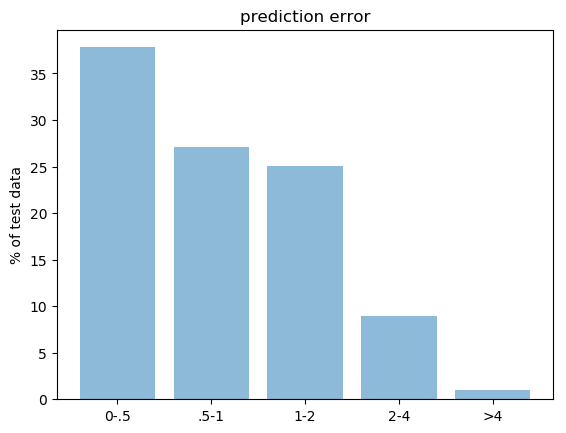

In [95]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
size=len(y_test)/100
objects = ('0-.5', '.5-1', '1-2', '2-4', '>4')
y_pos = np.arange(len(objects))
performance = [count1/size,count2/size,count3/size,count4/size,count5/size]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('% of test data')
plt.title('prediction error')
 
plt.show()

In [81]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2_score = r2_score(y_test, predictions)
mse_score=mean_squared_error(reality, predictions)
print(mse_score, r2_score)


1.5868334856469313 0.41308993831589524


In [85]:
count=0
for i in range(0,len(predictions),1):
    if abs(predictions[i]-reality.iloc[i])<.1:
        print (X_test.iloc[i])
        
count    

Average_Score                                                 8.4
lat                                                       51.4938
lng                                                     -0.191758
Reviewer_Nationality                                     Finland 
Hotel_Name                           Park Grand London Kensington
Review_Total_Positive_Word_Counts                              85
Review_Total_Negative_Word_Counts                              56
Name: 149771, dtype: object
Average_Score                                     9.1
lat                                           52.3711
lng                                           4.89368
Reviewer_Nationality                  United Kingdom 
Hotel_Name                           Hotel V Nesplein
Review_Total_Positive_Word_Counts                   9
Review_Total_Negative_Word_Counts                  23
Name: 384522, dtype: object
Average_Score                                         8.5
lat                                           

Name: 345610, dtype: object
Average_Score                                                    8
lat                                                        52.3773
lng                                                        4.89782
Reviewer_Nationality                               United Kingdom 
Hotel_Name                           Park Plaza Victoria Amsterdam
Review_Total_Positive_Word_Counts                                2
Review_Total_Negative_Word_Counts                                3
Name: 307769, dtype: object
Average_Score                                                      8.2
lat                                                            51.4954
lng                                                          -0.181897
Reviewer_Nationality                                   United Kingdom 
Hotel_Name                           Radisson Blu Edwardian Vanderbilt
Review_Total_Positive_Word_Counts                                   28
Review_Total_Negative_Word_Counts                

Name: 224230, dtype: object
Average_Score                                       9.1
lat                                             48.8482
lng                                             2.34903
Reviewer_Nationality                    United Kingdom 
Hotel_Name                           Residence Henri IV
Review_Total_Positive_Word_Counts                    48
Review_Total_Negative_Word_Counts                    25
Name: 205694, dtype: object
Average_Score                                  7.7
lat                                        48.8639
lng                                        2.36587
Reviewer_Nationality                  Switzerland 
Hotel_Name                                1K Hotel
Review_Total_Positive_Word_Counts               16
Review_Total_Negative_Word_Counts               15
Name: 43212, dtype: object
Average_Score                                           8.9
lat                                                 51.5611
lng                                             

Average_Score                                                     8.7
lat                                                           52.3547
lng                                                           4.91316
Reviewer_Nationality                                           India 
Hotel_Name                           The Student Hotel Amsterdam City
Review_Total_Positive_Word_Counts                                  51
Review_Total_Negative_Word_Counts                                   9
Name: 509237, dtype: object
Average_Score                                           8.3
lat                                                 45.5257
lng                                                   9.215
Reviewer_Nationality                              Zimbabwe 
Hotel_Name                           Hotel degli Arcimboldi
Review_Total_Positive_Word_Counts                        35
Review_Total_Negative_Word_Counts                         0
Name: 496086, dtype: object
Average_Score                     

Name: 288625, dtype: object
Average_Score                                                        8.8
lat                                                              51.5268
lng                                                            -0.132491
Reviewer_Nationality                                     United Kingdom 
Hotel_Name                           St Pancras Renaissance Hotel London
Review_Total_Positive_Word_Counts                                      4
Review_Total_Negative_Word_Counts                                      0
Name: 321076, dtype: object
Average_Score                                                         9
lat                                                             51.5105
lng                                                           -0.126582
Reviewer_Nationality                                             Egypt 
Hotel_Name                           St Martins Lane A Morgans Original
Review_Total_Positive_Word_Counts                                    15
R

Average_Score                                                               7.1
lat                                                                     51.5019
lng                                                                  -0.0232208
Reviewer_Nationality                                               Switzerland 
Hotel_Name                           Britannia International Hotel Canary Wharf
Review_Total_Positive_Word_Counts                                             6
Review_Total_Negative_Word_Counts                                             4
Name: 67274, dtype: object
Average_Score                                               8.3
lat                                                     51.4916
lng                                                   -0.196319
Reviewer_Nationality                            United Kingdom 
Hotel_Name                           Twenty Nevern Square Hotel
Review_Total_Positive_Word_Counts                            10
Review_Total_Negative_Word_Co

Average_Score                                                7.5
lat                                                      51.5157
lng                                                    -0.180218
Reviewer_Nationality                             United Kingdom 
Hotel_Name                           Park Grand London Hyde Park
Review_Total_Positive_Word_Counts                              4
Review_Total_Negative_Word_Counts                             34
Name: 243399, dtype: object
Average_Score                                               8.5
lat                                                     48.8454
lng                                                      2.3753
Reviewer_Nationality                            United Kingdom 
Hotel_Name                           Novotel Paris Gare De Lyon
Review_Total_Positive_Word_Counts                            15
Review_Total_Negative_Word_Counts                             0
Name: 90665, dtype: object
Average_Score                             

Average_Score                                                7.7
lat                                                      41.3778
lng                                                       2.1136
Reviewer_Nationality                             United Kingdom 
Hotel_Name                           Senator Barcelona Spa Hotel
Review_Total_Positive_Word_Counts                             25
Review_Total_Negative_Word_Counts                             23
Name: 295574, dtype: object
Average_Score                                                   8.2
lat                                                         52.3681
lng                                                         4.84408
Reviewer_Nationality                                United Kingdom 
Hotel_Name                           Ramada Apollo Amsterdam Centre
Review_Total_Positive_Word_Counts                                94
Review_Total_Negative_Word_Counts                                 0
Name: 459883, dtype: object
Average_Score

Average_Score                                           9.4
lat                                                 41.3886
lng                                                  2.1713
Reviewer_Nationality                  United Arab Emirates 
Hotel_Name                           Catalonia Square 4 Sup
Review_Total_Positive_Word_Counts                        10
Review_Total_Negative_Word_Counts                         2
Name: 433442, dtype: object
Average_Score                                       8.8
lat                                             48.8713
lng                                             2.31919
Reviewer_Nationality                            Turkey 
Hotel_Name                           H tel du Minist re
Review_Total_Positive_Word_Counts                     3
Review_Total_Negative_Word_Counts                     0
Name: 147413, dtype: object
Average_Score                                     9.1
lat                                           48.8795
lng                     

Average_Score                                           8.3
lat                                                 45.5257
lng                                                   9.215
Reviewer_Nationality                              Bulgaria 
Hotel_Name                           Hotel degli Arcimboldi
Review_Total_Positive_Word_Counts                        31
Review_Total_Negative_Word_Counts                        19
Name: 496215, dtype: object
Average_Score                                     8.8
lat                                           52.3545
lng                                            4.8875
Reviewer_Nationality                  United Kingdom 
Hotel_Name                           Sir Albert Hotel
Review_Total_Positive_Word_Counts                  11
Review_Total_Negative_Word_Counts                   0
Name: 266312, dtype: object
Average_Score                                                             8.9
lat                                                                 

Name: 274087, dtype: object
Average_Score                                                           8.1
lat                                                                  51.499
lng                                                               -0.191707
Reviewer_Nationality                                        United Kingdom 
Hotel_Name                           Copthorne Tara Hotel London Kensington
Review_Total_Positive_Word_Counts                                         5
Review_Total_Negative_Word_Counts                                        21
Name: 443253, dtype: object
Average_Score                                               8.7
lat                                                     48.8666
lng                                                     2.30844
Reviewer_Nationality                  United States of America 
Hotel_Name                                      H tel San R gis
Review_Total_Positive_Word_Counts                            18
Review_Total_Negative_Word_C

Name: 96825, dtype: object
Average_Score                                                           8.4
lat                                                                 51.4242
lng                                                                -0.22935
Reviewer_Nationality                                           New Zealand 
Hotel_Name                           Hotel du Vin Cannizaro House Wimbledon
Review_Total_Positive_Word_Counts                                        17
Review_Total_Negative_Word_Counts                                         6
Name: 508380, dtype: object
Average_Score                                                            7.8
lat                                                                  41.3284
lng                                                                  2.11296
Reviewer_Nationality                                                 Mexico 
Hotel_Name                           Hotel Best Western PLUS Alfa Aeropuerto
Review_Total_Positive_Word_C

0

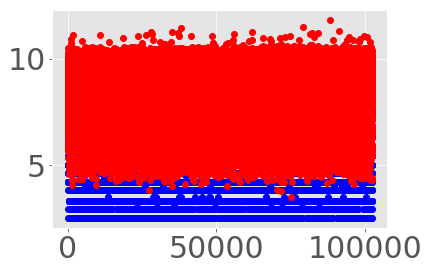

In [270]:
plt.plot(reality,'bo')
plt.plot(predictions,'ro')
plt.show()

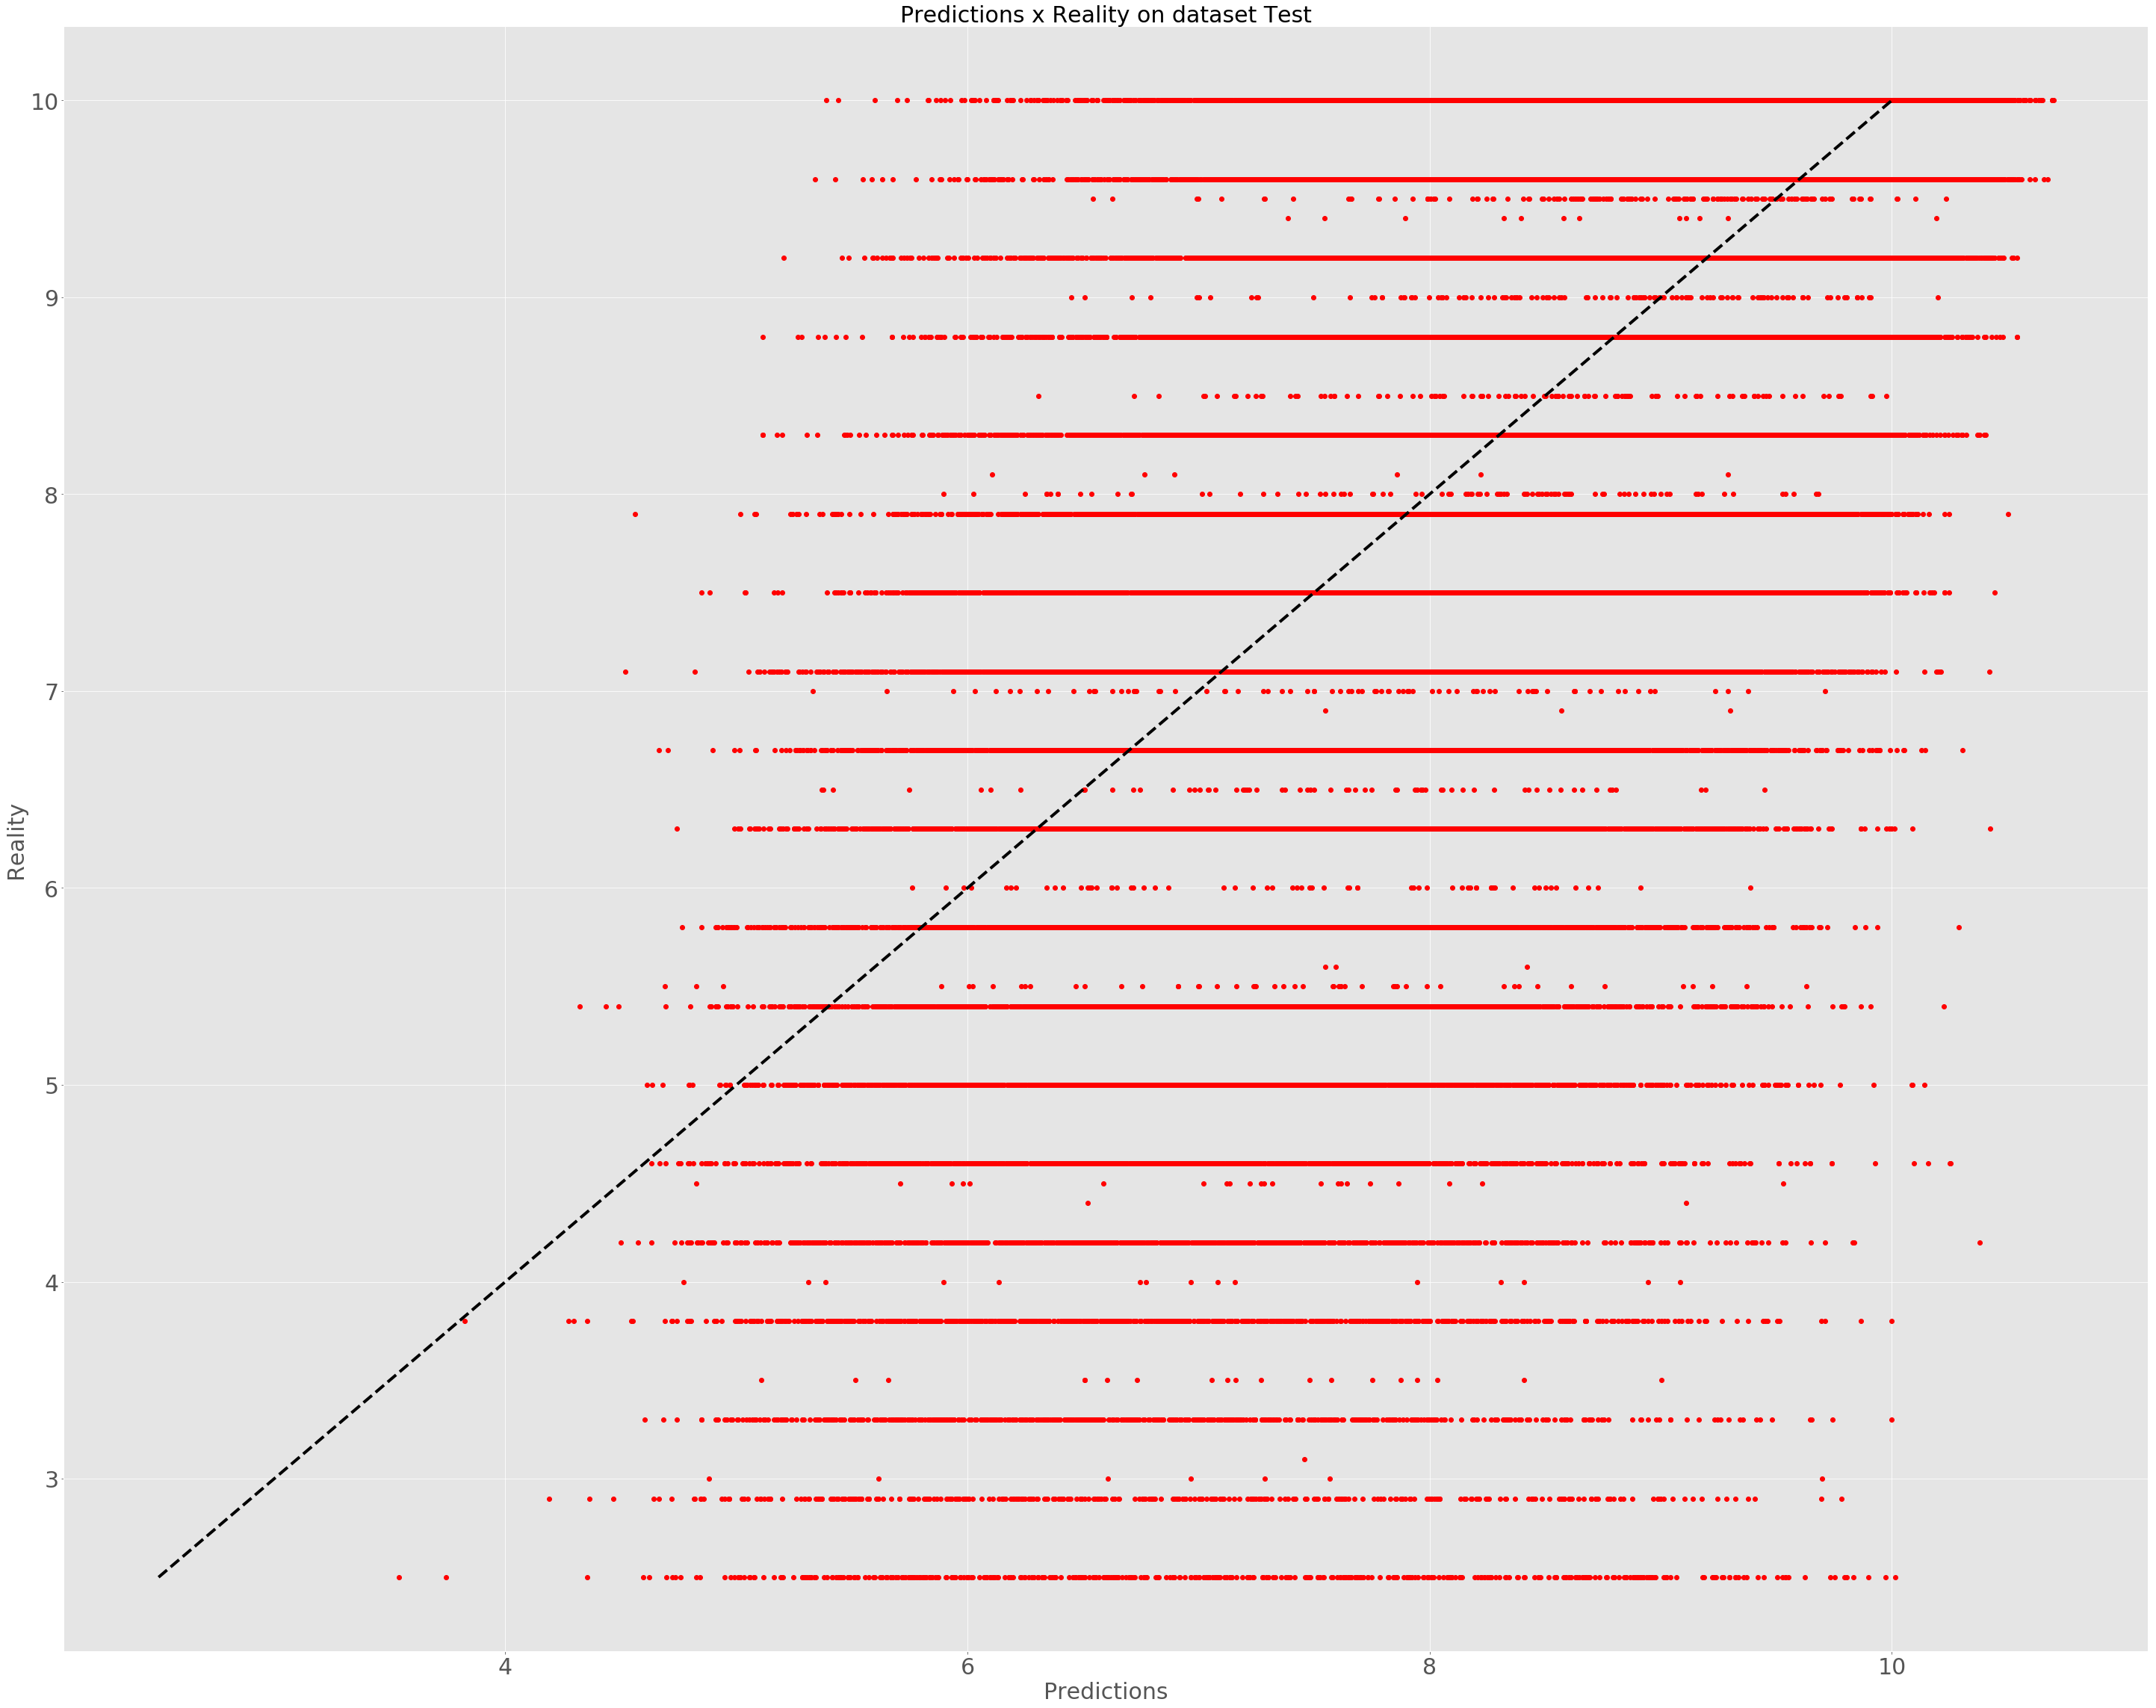

In [82]:
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions, reality, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [ ]:
!pip install --ignore-installed --upgrade tensorflow


In [12]:
est.fit(x=x, y=y, steps=2)

INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 10, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 1, 'num_features': 3, 'regression': True, 'bagged_num_features': 3, 'bagged_features': None, 'num_outputs': 1, 'num_output_columns': 2, 'base_random_seed': 0, 'leaf_model_type': 2, 'stats_model_type': 2, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}
INFO:tensorflow:dense_features_size: 3

TypeError: Input 'input_data' of 'TreePredictionsV4' Op has type float64 that does not match expected type of float32.

In [ ]:
def pandas_input_fn(x, y=None, batch_size=128, num_epochs=None):
  def input_fn():
    if y is not None:
      x['target'] = y
    queue = feeding_functions._enqueue_data(
      x, 1000, shuffle=num_epochs is None, num_epochs=num_epochs)
    if num_epochs is None:
      features = queue.dequeue_many(batch_size)
    else:
      features = queue.dequeue_up_to(batch_size)
    features = dict(zip(['index'] + list(x.columns), features))
    if y is not None:
      target = features.pop('target')
      return features, target
    return features
  return input_fn

In [25]:
est.fit(input_fn=pandas_io.pandas_input_fn(x=x,y=y,shuffle=True), steps=2)


INFO:tensorflow:Constructing forest with params = 
INFO:tensorflow:{'num_trees': 10, 'max_nodes': 1000, 'bagging_fraction': 1.0, 'feature_bagging_fraction': 1.0, 'num_splits_to_consider': 10, 'max_fertile_nodes': 0, 'split_after_samples': 250, 'valid_leaf_threshold': 1, 'dominate_method': 'bootstrap', 'dominate_fraction': 0.99, 'model_name': 'all_dense', 'split_finish_name': 'basic', 'split_pruning_name': 'none', 'collate_examples': False, 'checkpoint_stats': False, 'use_running_stats_method': False, 'initialize_average_splits': False, 'inference_tree_paths': False, 'param_file': None, 'split_name': 'less_or_equal', 'early_finish_check_every_samples': 0, 'prune_every_samples': 0, 'num_classes': 1, 'num_features': 3, 'regression': True, 'bagged_num_features': 3, 'bagged_features': None, 'num_outputs': 1, 'num_output_columns': 2, 'base_random_seed': 0, 'leaf_model_type': 2, 'stats_model_type': 2, 'finish_type': 0, 'pruning_type': 0, 'split_type': 0}


TypeError: '<' not supported between instances of '_RealValuedColumn' and 'str'